<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


Thank you very much for such a good job! I've left a couple of new comments with digit 3. However, there are no issues that need to be fixed, so I can accept the project. Congratulations and good luck! 😊 
    
 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for the updates! I've left a few comments titled as **Reviewer's comment 2**. Would you take a look?
 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, I am a reviewer on this project. Congratulations on submitting another project! 🎉

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<div class="alert alert-info"> <b>Student comments:</b> Can you tell me, overall how was my work in this project? </div>   
    
<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did a great job here, thank you so much for submitting the project! The project has a very good and clear structure, which is very important. It also has a lot of charts. It's good, visualization never hurts. However, I cannot run the project, since the local path is used. Would you update it and use the server path to the file? I still left some comments that may help you improve the project. Please take a look :) 
    
    
I will wait for the project for the second review :)
    
    

<hr>
    
Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 

</div>

# Games #

## Introduction ##

Online store Ice sells video games all over the world. User reviews, expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. Using the datasets, identify the patterns to determine whether a games succeeds or not. Doing this will allow one to spot potential big winners and plan advertising campaigns. The dataset contains the abbreviation ESRB for The Entertainment Software Rating Board which evalutes a game's content and assigns an age rating such as Teen or Mature.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
    
</div>

## Data Overview ##

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Local path is used here. Please use the server path mentioned in the task description. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Good! 
    
</div>

In [3]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Data preprocessing ##

In [4]:
column_names = games.columns.tolist()
display(column_names)

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [5]:
games = games.rename(
      columns=
    {
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    })

In [6]:
column_names = games.columns.tolist()
display(column_names)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [7]:
n_rows, n_cols = games.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 16715 rows and 11 columns


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
   

You can convert types in one cell.     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
I apologize for not mentioning it before, but sales should not be converted to integers. Sales are USD values. Is it a good idea to lose data? If `na_sales` value is 0.4, it is 0.4 millions or \$400,000. Converting it to the integer makes this value zero.     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Good! 
    
</div>

In [10]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Duplicates

In [11]:
duplicated_games = games[games.duplicated()]
print(f"Number of duplicated games: {duplicated_games.shape[0]}")

Number of duplicated games: 0


In [12]:
unobvious_duplicates = games.groupby(['name','platform','year_of_release']).size().reset_index(name='count')
unobvious_duplicates_with_counts = unobvious_duplicates[unobvious_duplicates['count'] > 1]
display(unobvious_duplicates_with_counts)

,name,platform,year_of_release,count
7652,Madden NFL 13,PS3,2012.0,2


In [13]:
games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

In [14]:
duplicates_remaining = games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print(f"Number of duplicates remaining after dropping: {duplicates_remaining}")

Number of duplicates remaining after dropping: 0


When looking for the duplicates in the overall 'games' DataFrame, there were no duplicates found. But, when I looked for the duplicates in multiple columns, there was one found, so end up dropping it. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Yes, it's very important to check for the duplicates. Sometimes they can impair the quality of the analysis.

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
There can be unobvious duplicates, or duplicates in multiple columns. For example, there may be rows that have the same game's name, genre, year of release, platform and age rating, but they may have different user scores for some reason. Try to find them in a columns `'name', 'platform', 'year_of_release'`, for instance.  

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

Good. 
    
</div>

### Missing values ###

In [15]:
display(games.isna().sum())

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

From the code above, it is known that columns 'year_of_release', 'genre', 'name', 'critic_score', 'user_score', and 'rating' have some missing values. It is important to deal with those missing data as it effects the conclusion one might get to. 

In [16]:
games.isnull().sum()/len(games)

name               0.000060
platform           0.000000
year_of_release    0.016095
genre              0.000060
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513193
user_score         0.400886
rating             0.404775
dtype: float64

In [17]:
display(games['year_of_release'].value_counts(dropna=False))

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      61
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [18]:
display(games['critic_score'].value_counts(dropna=False))

NaN     8577
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

In [19]:
display(games['user_score'].value_counts(dropna=False))

NaN    6700
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
0.5       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [20]:
display(games['rating'].value_counts(dropna=False))

NaN     6765
E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [21]:
missing_games = games[(games['name'].isna()) & (games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]
display(missing_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


From the code above, it was known that there is one row in which all the columns which have missing data have missing data. 

In [22]:
games = games.dropna(subset=['name'])

So, as one row have most of the columns data missing, and columns 'name' and 'genre', only have this row which have missing data, I end up dropping those two rows.

In [23]:
print(games.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [24]:
missing_four = games[(games['year_of_release'].isna()) & (games['critic_score'].isna()) & (games['user_score'].isna()) & (games['rating'].isna())]
display(missing_four)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16059,Dance! It's Your Stage,Wii,NaN,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


The above code shows that the there are 85 rows which have missing data in the four columns. Those four columns are the only ones with missing data. Due to this reason, I end up removing those 85 rows from the DataFrame.   

In [25]:
games = games.dropna(subset=['year_of_release'])

In [26]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [27]:
missing_two = games[(games['critic_score'].isna()) & (games['user_score'].isna())]
display(missing_two)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Looks good! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 2</h2>
    

Try to use **display** instead of **print** for the dataframes :) 


Display is a great thing. However, jupyter notebook is an interactive environment that already includes display. When we call a dataframe (see the code below), jupyter prints this dataframe like we do with the display method:

</div>

In [28]:
# Reviewer's code 2
 
display(games.head(3))

games.tail(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
It's great that you are correctly applying `fillna` + `groupby` methods. It is indeed sometimes very useful! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
However, the code above implies that scores depend on year and genre. Do year and genre define a score? Does it mean that all shooters in 2012 games were good, while all shooters in 2011 were worse? No, it does not. Moreover, we  are replacing 50% of data, thus receiving a lot of artificial values. 


Since these gaps do not impede the analysis, let's just leave them in our data. It is ok to have missing values. 

</div>

Even after dropping some of the data rows, column 'critic_score' still have around 8461 rows with missing data.

In [29]:
games['user_score'].replace('tbd', np.nan, inplace=True)

As 'tbd' is an abbreviation for to be determined, which means that it is not known yet. So first of all, using the code above I end up converting it to nan which helps us to identify the total missing data in that column. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Makes sense.     
</div>

In [30]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Same issue.
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Is it a good idea to fill in the gaps with just a mode? Please keep in mind that there may be a reason why we do not have ESRB rating in some rows. It is possible that these games are not supposed to have ESRB ratings because of their region, for instance. 

</div>

In [31]:
print(games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64


In [32]:
games.isnull().sum()/len(games)

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514565
user_score         0.546190
rating             0.406009
dtype: float64

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
After you remove the code with the replacements, please don't forget to remove this one as well, because we do not want to drop 50% of data :) 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Good!</div>

In [33]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice code!     
</div>

In [34]:
display(games[['genre','na_sales','eu_sales','jp_sales','other_sales','total_sales']])

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Sports,41.36,28.96,3.77,8.45,82.54
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.68,12.76,3.79,3.29,35.52
3,Sports,15.61,10.93,3.28,2.95,32.77
4,Role-Playing,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...
16710,Action,0.00,0.00,0.01,0.00,0.01
16711,Sports,0.00,0.01,0.00,0.00,0.01
16712,Adventure,0.00,0.00,0.01,0.00,0.01
16713,Platform,0.01,0.00,0.00,0.00,0.01


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
 
- In your opinion, how these missing values could occur? From the task: `Why do you think the values are missing? Give possible reasons.`
    
    
- Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data we have and what we are going to do next. 

</div>


Missing reviews might be due to not having enough reviews from critics or users before the data was published. There are some missing data in 'year_of_release' column, because some games may had been released later in certain platforms or regions. Due to this reason, enough reviews might not been collected or available at the time when the data was gathered. Some games might be unpopular and thus would not have attracted enough critcs or users to write a review or rate the game. In ERSB rating, there might be some regional differences which had led to missing data for the column.

For the games DataFrame on which I am working on, to make it easy to understand the data, the column names are renamed. 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales' columns, represents sales in USD million in North America, Europe, Japan, and other countries respectively. Before I had converted sales into integers, but realized that sales should not be converted to integers. Sales are USD values.Converting sales to the integer makes decimals values close to zero like 0.4 to zero values. But converted 'year_of_release' column to integers, as they are presented in whole numbers. Due to which one will lose data. When looking for the duplicates in the overall 'games' DataFrame, there were no duplicates found. But, when I looked for the duplicates in multiple columns, there was one found, so end up dropping it. Columns 'year_of_release', 'genre', 'name', 'critic_score', 'user_score', and 'rating' have some missing values. As column 'name' only had one row with missing value, so I end up dropping it. The above code shows that the there are 85 rows which have missing data in the four columns. Those four columns are the only ones with missing data. Due to this reason, I end up removing those 85 rows from the DataFrame.As 'tbd' is an abbreviation for to be determined, which means that it is not known yet. So first of all, I end up converting it to 'nan' which helps us to identify the total missing data in that column. As still 'critic_score', 'user_score', and 'rating' columns have around 8000 missing values, filling or dropping those missing would effect the analysis, so I just kept those columns with missing values as they were. To make further analysis easier, I added a new column 'total_sales' which includes the sum of all sales. Lastly, now we will start our analysis to test the two hypothesis which are whether the average user ratings of the Xbox One are equal to that of PS4 platform and if the average user ratings of the games from action genre are equal to that of sports genre. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Very good job here!

</div>

## Data Analysis ##

In [35]:
# How many games were released in different years. Is the data for every period significant?
games_per_year = games.groupby('year_of_release')['name'].nunique()
display(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

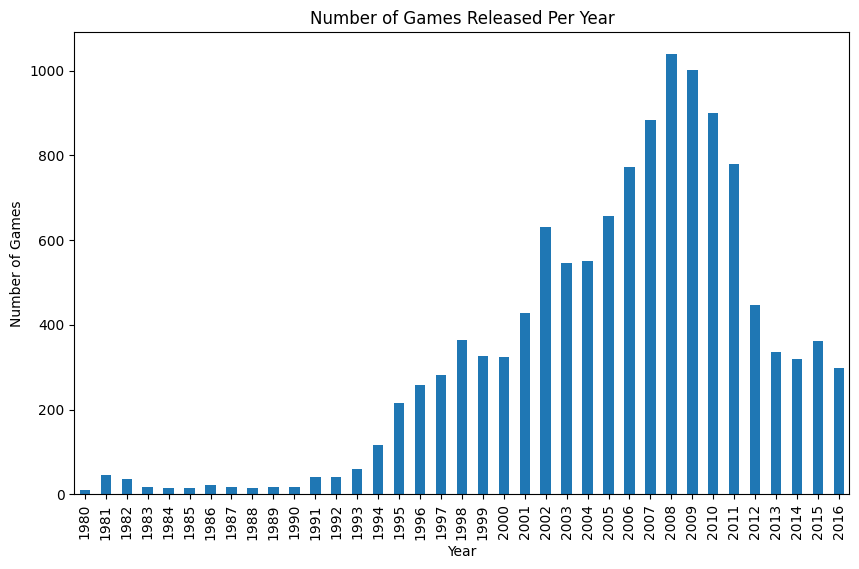

In [36]:
games_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Games Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

I think the data is not significant because there is a huge decline in the number of games after year 2011. This decline is surprising to me,as the use of technology is increasing day by day  and so the use of games. So, I think there should be enough data after 2011. Also, before year 2011, the number of games is almost double to that of after 2011. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It's great that you add a title with axes labels. 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

Years, however, can be converted to the integers.    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Well done!     
</div>

In [37]:
# Look at how sales varied from platform to platform.
total_sales_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(total_sales_platform)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [38]:
# Choose the platforms with the greatest total sales
top_platform = total_sales_platform.head(10).index
display(top_platform)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [39]:
top_platforms = games[games['platform'].isin(top_platform)]
display(top_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [40]:
top_platforms = games[games['platform'].isin(top_platform)][['platform', 'year_of_release', 'total_sales']]
display(top_platforms)

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91
...,...,...,...
16708,GBA,2002,0.01
16709,PS2,2008,0.00
16710,PS3,2016,0.01
16711,X360,2006,0.01


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

You do not need to drop so many columns when you can just create a copy with the columns you want: 


    
    top_platforms = games[games['platform'].isin(top_platform)][['platform', 'year_of_release', 'total_sales']]

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Good! 
    
</div>

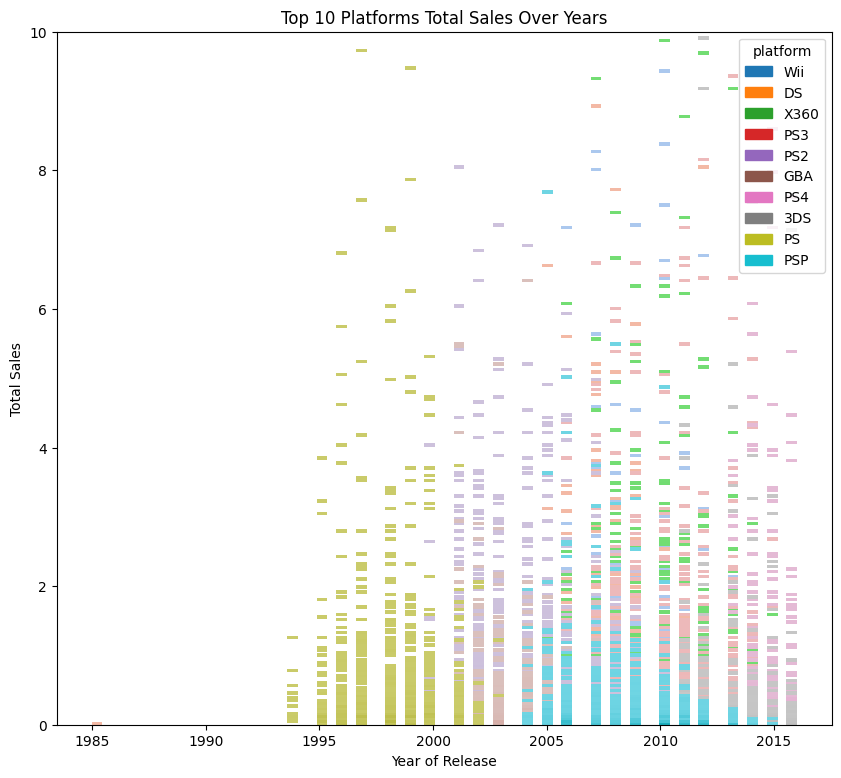

In [41]:
plt.figure(figsize=(10, 9))
sns.histplot(data=top_platforms, x='year_of_release', y='total_sales',hue='platform')
plt.title('Top 10 Platforms Total Sales Over Years')
plt.ylim(0, 10)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

From the graph, it is known that platform 'Wii' was at the top among list of platforms with highest total sales over years. But, it can be known that this platform didn't last for long time. Along with this, there are some platform such as 'PS', 'PSP', which are there for long time compare to that of 'Wii' but were among the top 10 platforms with the lowest sales over the years. 

<div class="alert alert-info"> <b>Student comments:</b> How should I make a simple line chart, I tried but its not working. </div>   

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
How did you try it? Take a look:  
</div>

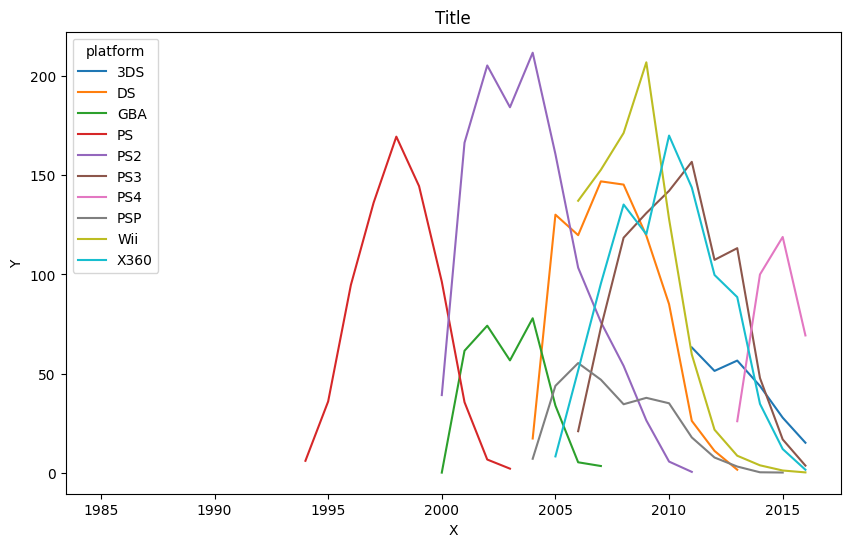

In [44]:
# Reviewer's code 3

top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,6))

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
A simple line chart will also be a good choice :)     
</div>

In [45]:
# Find platforms that used to be popular but now have zero sales.
last_sales_year = games[games['total_sales'] > 0].groupby('platform')['year_of_release'].max()
display(last_sales_year)

platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: int64

In [46]:
recent_year = games['year_of_release'].max()
display(recent_year)

2016

In [47]:
unpopular_platforms = last_sales_year[last_sales_year < recent_year]
display(unpopular_platforms)

platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: int64

In [48]:
# How long does it generally take for new platforms to appear and old ones to fade?
platform_lifespan = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
display(platform_lifespan)

,min,max
platform,,
2600,1980,1989
3DO,1994,1995
3DS,2011,2016
DC,1998,2008
DS,1985,2013
GB,1988,2001
GBA,2000,2007
GC,2001,2007
GEN,1990,1994


In [49]:
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
display(platform_lifespan.sort_values(by='lifespan', ascending=False))

,min,max,lifespan
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


In [50]:
new_platforms_per_year = games.groupby('year_of_release')['platform'].nunique().diff()
display(new_platforms_per_year)

year_of_release
1980    NaN
1981    0.0
1982    0.0
1983    1.0
1984    0.0
1985    2.0
1986   -2.0
1987    0.0
1988    2.0
1989   -1.0
1990    1.0
1991    0.0
1992    2.0
1993   -1.0
1994    5.0
1995   -2.0
1996    0.0
1997   -2.0
1998    1.0
1999    1.0
2000    1.0
2001    1.0
2002   -2.0
2003   -2.0
2004    1.0
2005    1.0
2006    2.0
2007    1.0
2008   -2.0
2009   -2.0
2010    0.0
2011    2.0
2012    0.0
2013    2.0
2014   -1.0
2015    0.0
2016   -1.0
Name: platform, dtype: float64

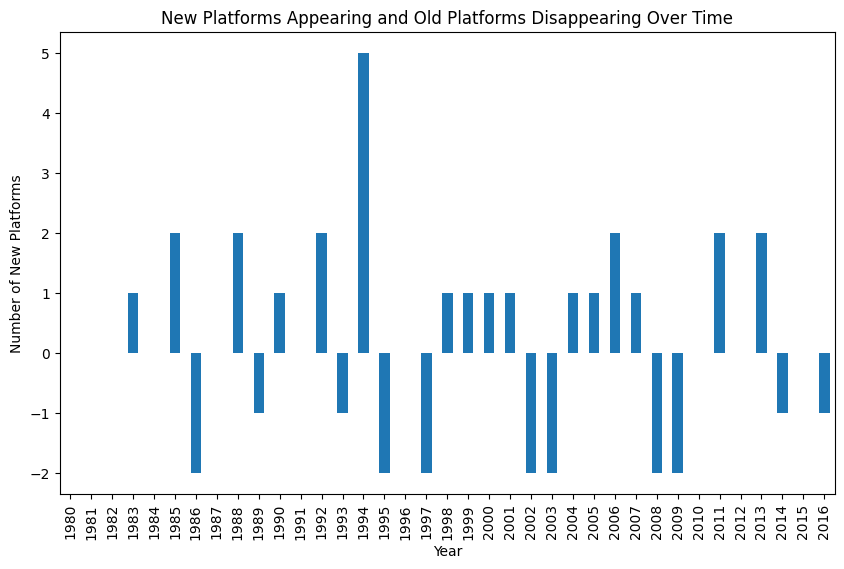

Number of platforms that faded before 2016: 22


In [51]:
new_platforms_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('New Platforms Appearing and Old Platforms Disappearing Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Platforms')
plt.show()

faded_platforms = (last_sales_year < recent_year).sum()
print(f"Number of platforms that faded before {recent_year}: {faded_platforms}")

The graph above shows the new platforms appearing and old platforms disappearing over time. From the graph, it can be seen that there are 22 platforms which faded before 2016. Among those, there are some new platforms which started appearing and end up disappearing before 2016. 

In [52]:
# Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017. Work only with the data that you've decided is relevant. Disregard the data for previous years.
relevant_data = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2017)]
display(relevant_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Solving this task, I also took about 10 years first. But then I realized that the market is dynamic, everything is changing. Some popular genre may not remain popular 10 years later. And vice versa. During this time, several platform generations will change :) The industry is evolving, the games are getting better, the graphics is getting better and the users are getting more demanding. In such tasks, we need fresh information, fresh estimation. If we forecast for 2017, then who cares what happened 10 years ago?  Potentially profitable platforms can be easily selected with charts and pivot tables, but user portraits may change. If we look at the very first sales chart, we will see in which year the market stabilized after huge volume sales. 
    
    
Let's adjust this choice and take years from 2012 or 2013. Years before 2012 have huge sales volume, which can influence our distributions. Moreover, new platforms appeared in 2012-2013, which means that these huge sales were generated by older platforms that cannot be relevant for so many years.   

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
It's a good decision for the following three reasons: 
    
    

1. Years before 2012 have huge sales volume, which can influence our distributions. 
    
    
2. New platforms appeared in 2012-2013, which means that these huge sales were generated by older platforms that cannot be relevant for so many years.     
    
3. Since graphics and other components change fast, users' preferences change as well. It means that most people had different perceptions 10 years ago compared to their current perception. 
    
    
</div>

Based on the relevant reason which you explained, it allowed me to build a model for 2017, the period I choose is 2013-2017. 

In [53]:
# Which platforms are leading in sales? 
sales_platform = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(sales_platform.head(10)) 

# I feel like they are not asking for it. 
sales_per_year = relevant_data.groupby('year_of_release')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


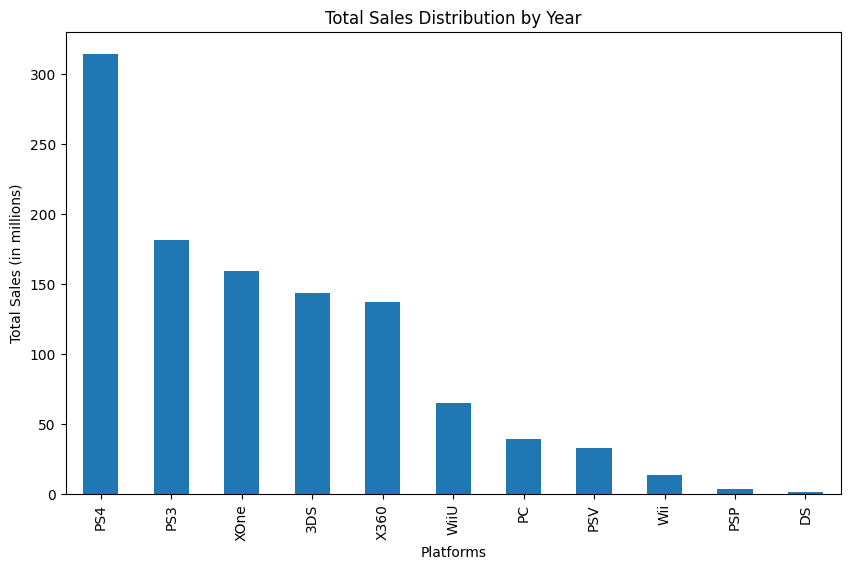

In [54]:
sales_platform.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales Distribution by Year')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (in millions)')
plt.show()

In [55]:
top_platforms = sales_platform.head().index
print(top_platforms)

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360'], dtype='object', name='platform')


From the graph above shows the total sales distribution of different platforms over the period (2013 - 2017) to build a model for 2017. Among the total sales distibution of different platforms, it is known that 'PS4' platform has the highest sales over time. Followed by that, 'PS3', 'XOne', '3DS', and 'X360' are the platforms where the sales distribution dropped by half to that of platform 'PS4'. Before 2013, if one sees 'Wii' was one platform with the highest number of sales while after 2013 its among the lowest sales. So, it is important to have relevant period which is only 5-6 years older than the year for which we are building a model. 

In [56]:
# Which ones are growing or shrinking? 
sales_per_platform_per_year = relevant_data.groupby(['year_of_release','platform'])['total_sales'].sum().unstack()
display(sales_per_platform_per_year)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


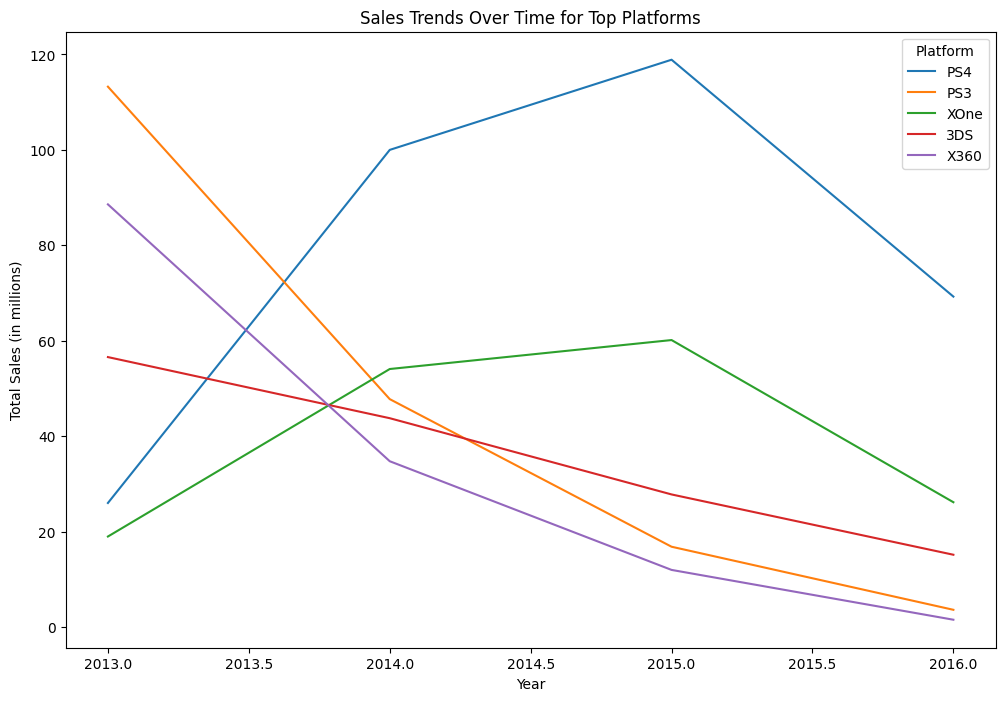

In [57]:
sales_per_platform_per_year[top_platforms].plot(figsize=(12, 8))
plt.title('Sales Trends Over Time for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.show()

The graph above shows the sales trends over time for top platforms. One can see that platform 'PS4' has been increasing for one year and then again increased for another year and had a drastic fall till 2016. 'XOne' platform has a similar trend like that of 'PS4' but at low level. Platforms 'PS3' and 'X360' almost had the same trend of a huge decrease for a year and then a slight decrease for another year and lastly another drop for a year. Lastly, platform '3DS' had a straight decline from year 2013 to 2016. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Be careful. Here you took platforms that have most total sales in these years (`top_platforms = sales_platform.head().index`). Of course, PS3 is an old platfrom that had enough time to sell a lot of games. But what if there's a brand new platform that did not have enough time to gain high sales volume? 
    
    
In order to choose promising platforms, please take all platforms within relevant time interval and look at how their sales change over time. 

</div>

In [58]:
platform_sales_change = sales_per_platform_per_year.diff().fillna(0)

platform_growth = platform_sales_change.sum()

growing_platforms = platform_growth.sort_values(ascending=False)

print("Platforms showing the most growth:")
print(growing_platforms.head(5))

print("Platforms showing the most decline:")
print(growing_platforms.tail(5))

Platforms showing the most growth:
platform
PS4     43.26
XOne     7.19
DS       0.00
PSP     -3.02
PSV     -6.34
dtype: float64
Platforms showing the most decline:
platform
Wii      -8.41
WiiU    -17.05
3DS     -41.43
X360    -87.06
PS3    -109.65
dtype: float64


From the code above, it is known that from the relevant data, the platforms showing the most growth are 'PS4', 'XOne', 'DS', 'PSP', 'PSV', while the platforms showing the most decline are 'Wii', 'WiiU', '3DS', 'X360', and 'PS3'. Among those platforms with most growth, I think 'PS4', and XOne' are the only ones with actual growth because there are other platforms but their sales are in negatives, so I think the sales of rest of the platforms are still in decline. 

In [59]:
# Select several potentially profitable platforms.
profitable_platforms = growing_platforms[growing_platforms > 0]

print("Potentially profitable platforms:")
print(profitable_platforms)

Potentially profitable platforms:
platform
PS4     43.26
XOne     7.19
dtype: float64


Among all the platforms, potentially most profitable platforms are 'PS4' and 'XOne' as those are the only platforms with positive growth while other platforms growth are declining and so have negative sale difference. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Since a lot of sales are zeros now, the results may still change. Please don't forget to update the conclusions if needed. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Agreed. I would also take 3DS into account, as it still has a large sales volume. Remember that we represent sales of the games released these years. Not sold but released. The 2014-2016 games haven't gained such volumes yet as, for instance, 2012 games have. Sometimes it is much easier to analyze a simple pivot table: 

</div>

In [60]:
# Reviewer's code 3

relevant_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


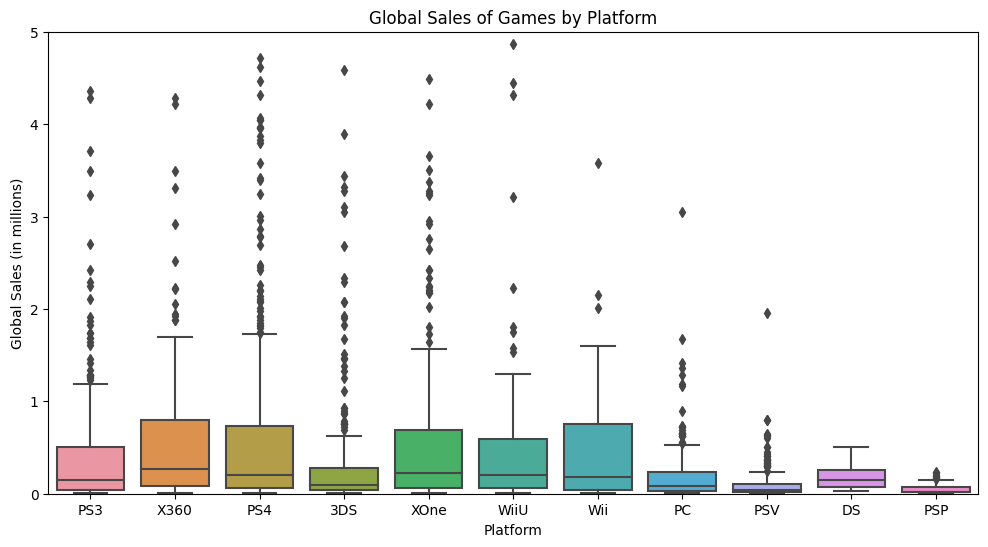

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.ylim(0, 5)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

One can see that all the platforms have outliers except platform 'DS'. For platform 'PS4', the median line is not in the center, which represents that most of the sales for this platform is higher than the median of the data. This is similar to other platforms such as 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'Wii', and 'PC'. One can see that among all the platforms, 'X360', 'PS4', 'XOne', and 'Wii' have larger box  which indicates more variability. While other platforms have smaller box which means less variability. Most of the outliers are on the upper side of the boxplots, so most of the platforms had some games which are doing great in sales compare to most of the games in a platform. 

I think the differences in the sales are significant due to real differences rather than random chance. Therefore, some platforms may indeed perform better in sales than others.

<div class="alert alert-info"> <b>Student comments:</b> What are some ways to find out if the differences in the sales are significant or not? </div>   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
> What are some ways to find out if the differences in the sales are significant or not? 
    
    
    
We can run statistical tests :) 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
>  I do think that the differences in sales are significant. 
    
    
In my opinion, we cannot even make any conclusion, since there are no sales :) Don't forget to update the conclusions after the results change. What can you say about the most promising platforms here? 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
No worries, I'll try to explain.


A boxplot shows us a distribution, like a histogram. 2 pictures below represent it: 


![image info](https://r-charts.com/en/distribution/histogram-boxplot_files/figure-html/histogram-boxplot.png)


![image.png](https://i.ytimg.com/vi/FPREzlHdWRY/maxresdefault.jpg)



But the boxplot is better, since we don't have to think about `bins` parameter for a histogram. Boxplot also shows us some statistics, while histogram doesn't. 


What does our boxplot tell us about? Since we are plotting sum world sales per game, outliers are just some very popular games. I would even say bestsellers. And this is a very illustrative thing. Look at the 3DS. Small box and lots of outliers. This suggests that a large part of the sales volume comes from these outliers. At the same time, the XOne has a different situation: a large box, a long whisker and few outliers. This indicates that a wide variety of games are bought on XOne, and, moreover, in considerable quantities.

That's why it may be useful to plot 2 graphs: with and without outliers. Just to evaluate the distribution.

That's how you can interpret boxplots. </div>

In [58]:
# What about average sales on various platforms? Describe your findings.
average_sales_platform = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(average_sales_platform.head(10))

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
Name: total_sales, dtype: float64


From the average sales on various platforms, it is known that platforms such as 'PS4' and 'X360' are one of the highest average sales among all the platforms followed by 'XOne', 'Wii', 'WiiU', and 'PS3' whose average sales are atleast above 0.50. 


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>


- It may be difficult to compare the boxes. Please, try to use the **ylim**, it will scale the graph. 
    
    
- There may be some outliers there, don't drop them. What do you think outliers can tell us? Just write any suggestions you have.</div>

In [59]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
ps4_platform = games[games['platform'] == 'PS4']

The one popular platform I choose is 'PS4', because it was growing till 2015 and then started shrinking. But, even it was shrinking, the sales were still high compare to that of other platform. 

In [60]:
ps4_platform['total_reviews'] =  ps4_platform[['critic_score','user_score']].sum(axis=1)

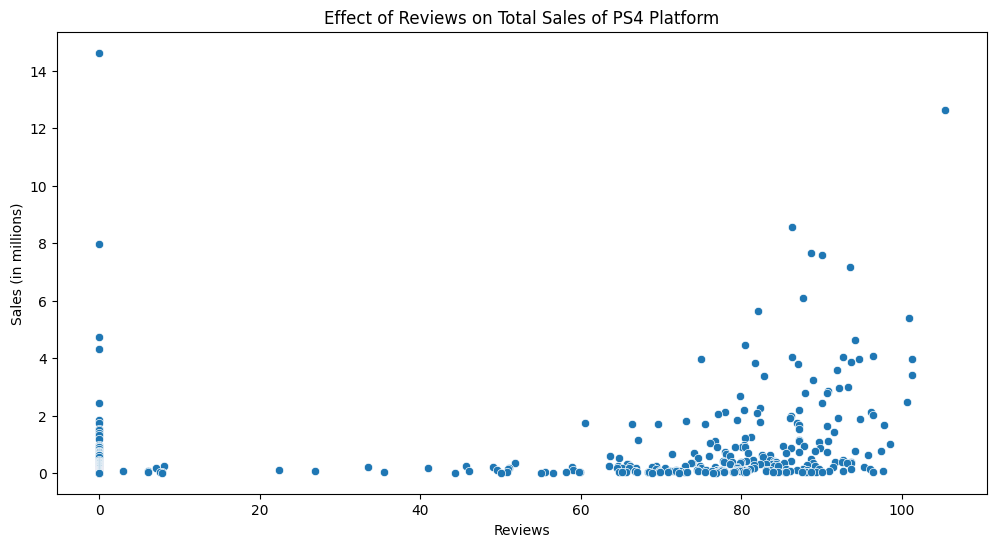

In [61]:
# Build a scatter plot 
plt.figure(figsize=(12,6))
sns.scatterplot(x='total_reviews', y='total_sales', data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('Reviews')
plt.ylabel('Sales (in millions)')
plt.show()

From the scatterplot above, it is known that when the total review scores were lower than 60, there were no change in the number of sales. But after the total review scores reached around 80, one can see an increase in the number of sales over time. 

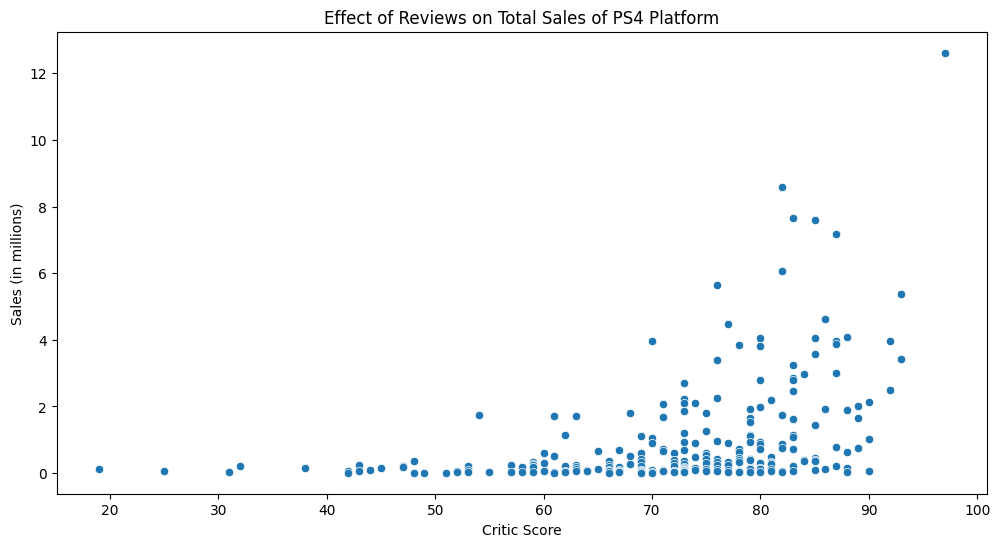

In [62]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('Critic Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the critic score and sales of PS4 platform. One can see that there was no effect of reviews on sales. But after critic review scores reached to 60 one can see slight increase in the number of sales, and then a huge increase by the time critic review scores reaches between 80 to 100. This shows that the games with good critic scores do well with their sales.  So if the critic score of the games increases, the amount of sales increases. 

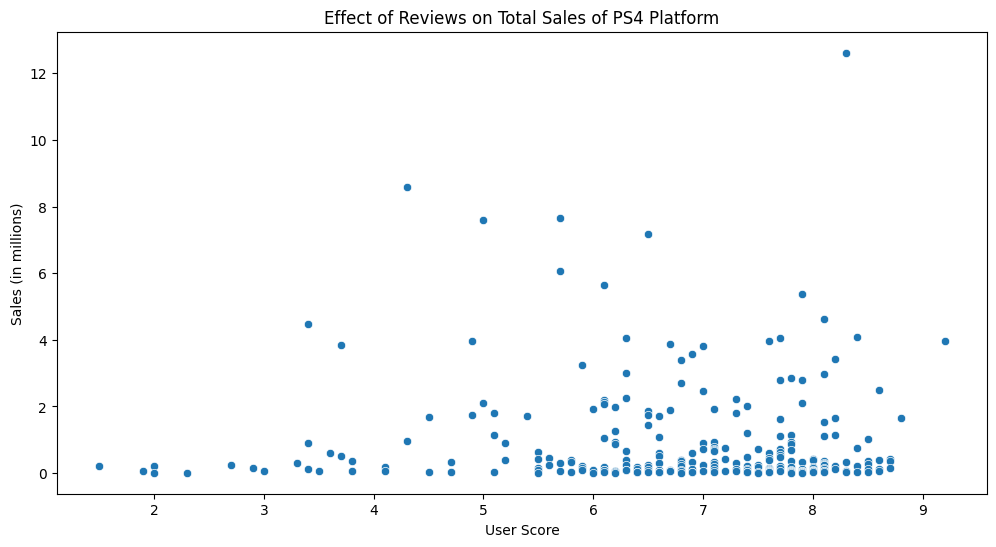

In [63]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_platform)
plt.title('Effect of Reviews on Total Sales of PS4 Platform')
plt.xlabel('User Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the user score and sales of PS4 platform. After the user review scores reached around 3 one can see an increase in the number of sales, and then a huge increase by the time user review scores reaches to 5-6. This shows that the games with good user scores do well with the sales. So if the user score of the games increases, the amount of sales increases. 

In [64]:
psv_psp_platform = games[(games['platform'] == 'PSV') | (games['platform'] == 'PSP')]

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

Do we need to include them in our analysis given they do not have sales in recent years? 
</div>

In [65]:
psv_psp_platform = psv_psp_platform.dropna(subset=['critic_score', 'user_score'])

In [66]:
display(psv_psp_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
91,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,2.90,2.81,0.24,1.73,88.0,7.6,M,7.68
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,0.47,0.55,4.13,0.34,81.0,8.7,T,5.49
204,Grand Theft Auto: Vice City Stories,PSP,2006,Action,1.70,1.99,0.16,1.18,86.0,8.0,M,5.03
272,Daxter,PSP,2006,Platform,2.45,1.01,0.00,0.75,85.0,8.7,E10+,4.21
344,Midnight Club 3: DUB Edition,PSP,2005,Racing,1.65,1.21,0.00,0.79,74.0,8.4,E10+,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16273,Doki-Doki Universe,PSV,2013,Adventure,0.00,0.01,0.00,0.00,66.0,5.7,E10+,0.01
16374,Dokuro,PSV,2012,Action,0.00,0.00,0.01,0.00,76.0,8.0,E10+,0.01
16473,Myst,PSP,2006,Adventure,0.00,0.01,0.00,0.00,69.0,4.8,E,0.01
16497,Dungeon Explorer: Warriors of Ancient Arts,PSP,2007,Role-Playing,0.01,0.00,0.00,0.00,56.0,5.5,T,0.01


In [67]:
psv_psp_platform['total_reviews'] =  psv_psp_platform[['critic_score','user_score']].sum(axis=1)

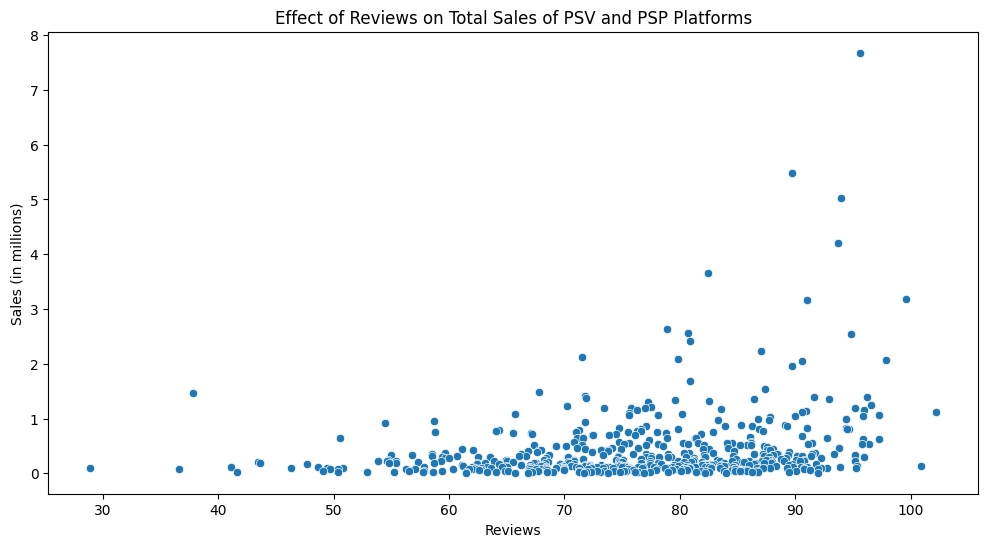

In [68]:
# Build a scatter plot 
plt.figure(figsize=(12,6))
sns.scatterplot(x='total_reviews', y='total_sales', data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('Reviews')
plt.ylabel('Sales (in millions)')
plt.show()

From the scatterplot above, it is known that when the total review scores were lower than 60, there were no change in the number of sales. But after the total review scores reached around 80, one can see an increase in the number of sales over time.

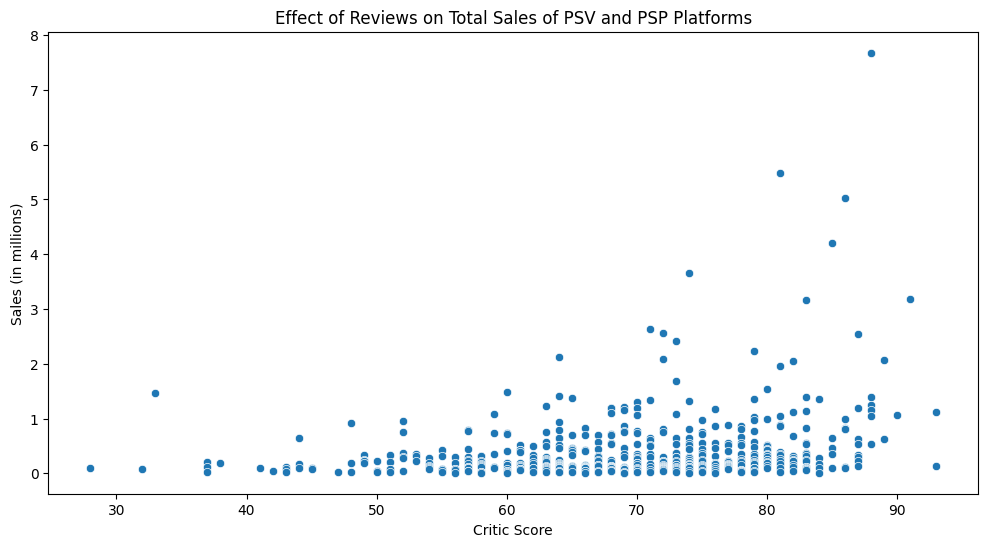

In [69]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('Critic Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the critic score and sales of PSV and PSP platforms. One can see that there was no effect of reviews on sales. But after critic review scores reached to 60 one can see slight increase in the number of sales, and then a huge increase by the time critic review scores reaches between 60 to 100. This shows that the games with good critic scores do well with their sales.  So if the critic score of the games increases, the amount of sales increases. 

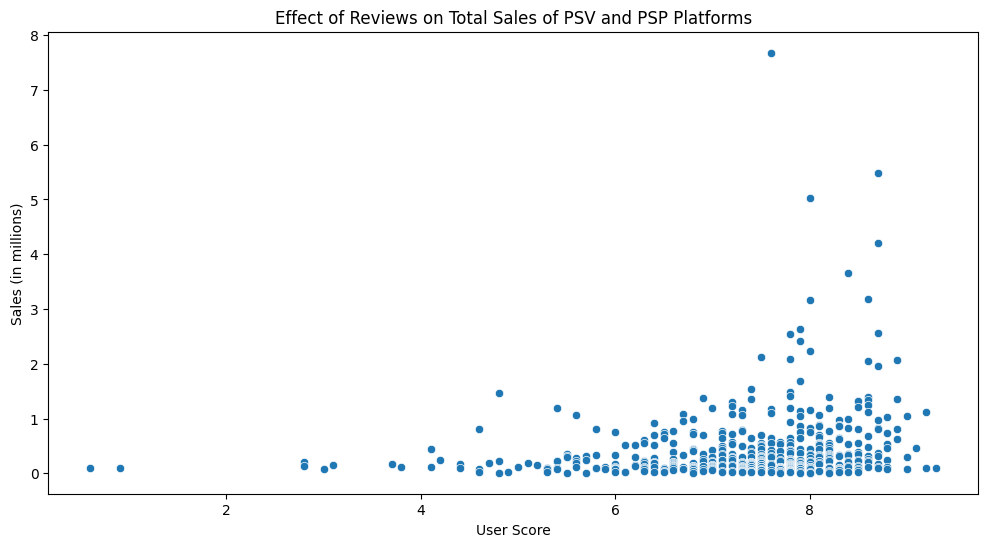

In [70]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=psv_psp_platform)
plt.title('Effect of Reviews on Total Sales of PSV and PSP Platforms')
plt.xlabel('User Score')
plt.ylabel('Sales (in millions)')
plt.show()

The scatterplot above shows the correlation between the user score and sales of PSV and PSP platforms. After the user review scores reached around 3 one can see an increase in the number of sales, and then a huge increase by the time user review scores reaches to 5-6. This shows that the games with good user scores do well with the sales. So if the user score of the games increases, the amount of sales increases. 

In [71]:
# Calculate the correlation between reviews and sales. Draw conclusions.
print(ps4_platform['total_reviews'].corr(ps4_platform['total_sales']))

0.21935045636597203


The correlation coefficient between total review scores and sales sales of platforms PS4 is close to 0 (0.219), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [72]:
print(ps4_platform['user_score'].corr(ps4_platform['total_sales']))

-0.031957110204556424


The corelation coefficient between user scores and sales is -0.0320 which is close to 0 but negative side. This shows that there is weaker negative correlation between the user score and sales on platform PS4 which means that as one variable increases, the other tends to decrease. 

In [73]:
print(ps4_platform['critic_score'].corr(ps4_platform['total_sales']))

0.40656790206178095


The correlation coefficient between total review scores and sales of platforms PS4 is close to 0 (0.407), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [74]:
# Calculate the correlation between reviews and sales. Draw conclusions.
print(psv_psp_platform['total_reviews'].corr(psv_psp_platform['total_sales']))

0.26179286460245926


The correlation coefficient between total review scores and sales sales of platforms PSV and PSP is close to 0 (0.262), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [75]:
print(psv_psp_platform['user_score'].corr(psv_psp_platform['total_sales']))

0.19329902182139339


The correlation coefficient between total review scores and sales of platforms PSV and PSP is close to 0 (0.193), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [76]:
print(psv_psp_platform['critic_score'].corr(psv_psp_platform['total_sales']))

0.2582339883354072


The correlation coefficient between total review scores and sales sales of platforms PSV and PSP is close to 0 (0.258), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

First, I choose 'PS4' as one of the populars platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PS4' platform. On the other side, I choose 'PSV' and 'PSP' as other platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PSV' and 'PSP' platform. From the correlation coefficient, it is known that total review scores and critic scores have weaker positive relationship with sales of 'PS4' platform and with sales of 'PSV' and 'PSP' platforms. So if total review scores are decreasing, the sales are increasing. But user scores have weaker positive relationship with sales of PSP and PSV platforms and weaker negative relationship with sales of PS4 platforms. So if the user score is decreasing then the sales of PSP and PSV platforms are increasing and the sales of PS4 are decreasing. 

But, as all the correlation coefficient are close to 0, it means that there is a lack of linear correlation and so change in one variable does not help in predicting changes in the other variable.

In [77]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.
multiplatform_games = relevant_data.groupby('name').filter(lambda x: x['platform'].nunique() > 1)
print(multiplatform_games[['name','platform','total_sales']])

                                                name platform  total_sales
16                                Grand Theft Auto V      PS3        21.05
23                                Grand Theft Auto V     X360        16.27
31                         Call of Duty: Black Ops 3      PS4        14.63
42                                Grand Theft Auto V      PS4        12.62
60                              Call of Duty: Ghosts     X360        10.24
...                                              ...      ...          ...
16672  Metal Gear Solid V: The Definitive Experience     XOne         0.01
16691                   Dynasty Warriors: Eiketsuden      PS3         0.01
16692              Metal Gear Solid V: Ground Zeroes       PC         0.01
16710                  Samurai Warriors: Sanada Maru      PS3         0.01
16714                            Winning Post 8 2016      PSV         0.01

[1443 rows x 3 columns]


In [78]:
mean_sales_per_platform = multiplatform_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(mean_sales_per_platform)

platform
PS4     0.884335
X360    0.747111
Wii     0.618636
XOne    0.603080
PS3     0.594621
3DS     0.330484
WiiU    0.321286
PC      0.208231
DS      0.192500
PSV     0.134643
PSP     0.102857
Name: total_sales, dtype: float64


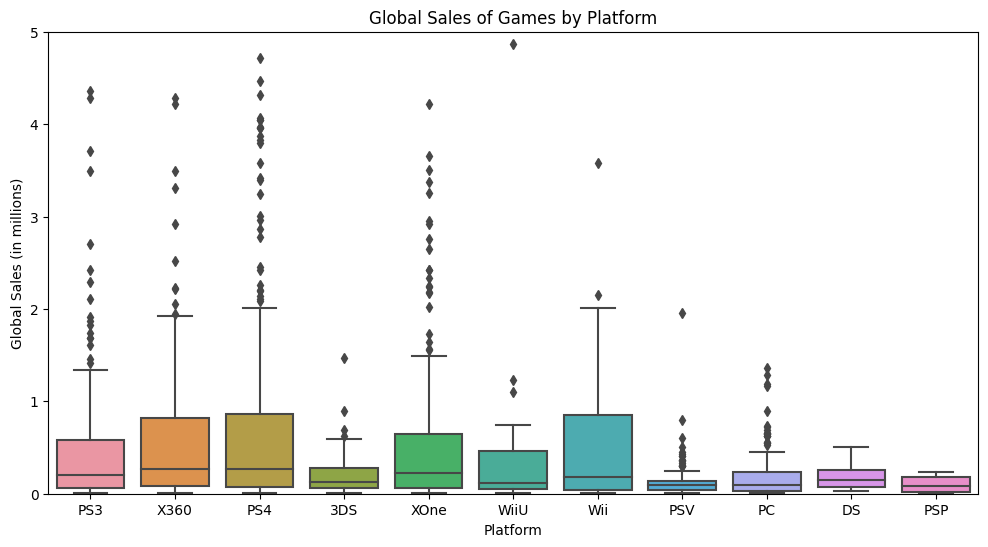

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='total_sales', data=multiplatform_games)
plt.ylim(0, 5)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

The above boxplot shows the relation of the global sales for multiplatform games by platform and on global sales. All the platforms except 'DS' and 'PSP' have outliers which shows that most of the multiplatform games on these platfrom are doing good in terms of sales. Along with this it can be known that among the platforms with outliers, platforms such as 'PS4' and 'XOne' have more oultiers compare to rest which shows that they have more multiplatform games which are doing good in terms on sales. While 'Wii' platform have only two outliers representing only two multiplatform games even though its variability is more among all the platforms. So, more variability in games does not mean high sales. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
    
According to the task, we have to choose 1 platform, analyze how sales depend on critics' and users' scores, display scatter plots and calculate the correlation coefficients. Then we have to choose  2 or more other platforms, repeat the correlation analysis for them and compare the results. Would you add it?  


The wording in this task is ambiguous, but since we are comparing platforms, it is reasonable to take scores for all games on the platform within a chosen period. In other words, you do not need to check each game in the dataset. 

All you need here is to take 2 or more other platforms and repeat the analysis. Then compare the results.

</div>

In [80]:
# Take a look at the general distribution of games by genre. 
games_genre = relevant_data['genre'].value_counts()
display(games_genre)

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

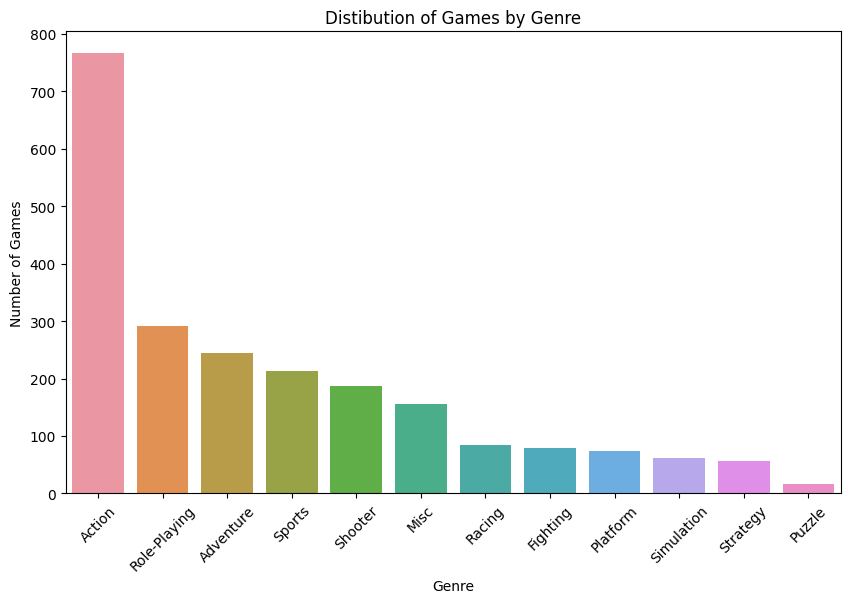

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=games_genre.index , y=games_genre.values)
plt.title('Distibution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

The above graph shows the distribution of games by genre. Based on the graph, it is known that among all the games, most of the games are action games, followed by role-playing, adeventure, sports, shooter, and misc. Between those two genres, from action to role-playing, the number of games have almost dropped to half. 

In [82]:
# What can we say about the most profitable genres? 
print(games_genre.head())

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Name: genre, dtype: int64


Among all different genres, the genres with most games are action, role-playing, adventure, sports, and shooter. But, if genres are having more number of games doesn't mean that they are the most profitable genres. 

In [83]:
# Can you generalize about genres with high and low sales?
genres_total_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(f"Genres with High Sales:")
print(genres_total_sales.head())

print(f"Genres with Low Sales:")
print(genres_total_sales.tail())

Genres with High Sales:
genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64
Genres with Low Sales:
genre
Fighting      35.31
Adventure     23.64
Simulation    21.76
Strategy      10.08
Puzzle         3.17
Name: total_sales, dtype: float64


In [84]:
genre_sales_stats = relevant_data.groupby('genre')['total_sales'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)
print(genre_sales_stats)

                  mean  median
genre                         
Shooter       1.245882   0.450
Sports        0.703972   0.240
Platform      0.576081   0.225
Role-Playing  0.499623   0.125
Racing        0.469294   0.120
Fighting      0.441375   0.125
Action        0.420196   0.110
Misc          0.405290   0.100
Simulation    0.350968   0.100
Puzzle        0.186471   0.060
Strategy      0.180000   0.080
Adventure     0.096490   0.030


In [85]:
action_total_sales = relevant_data[relevant_data['genre']== 'Action']
print(action_total_sales[['name', 'genre', 'total_sales']].head(10))

                                       name   genre  total_sales
16                       Grand Theft Auto V  Action        21.05
23                       Grand Theft Auto V  Action        16.27
42                       Grand Theft Auto V  Action        12.62
149                          The Last of Us  Action         5.86
165                      Grand Theft Auto V  Action         5.47
225                          The Last of Us  Action         4.72
231  Uncharted: The Nathan Drake Collection  Action         4.62
235              Luigi's Mansion: Dark Moon  Action         4.59
295                              Watch Dogs  Action         4.05
304                 Assassin's Creed: Unity  Action         3.96


In [86]:
shooter_total_sales = relevant_data[relevant_data['genre']== 'Shooter']
print(shooter_total_sales[['name', 'genre', 'total_sales']].head(10))

                               name    genre  total_sales
31        Call of Duty: Black Ops 3  Shooter        14.63
60             Call of Duty: Ghosts  Shooter        10.24
69             Call of Duty: Ghosts  Shooter         9.36
87     Star Wars Battlefront (2015)  Shooter         7.98
92   Call of Duty: Advanced Warfare  Shooter         7.66
99        Call of Duty: Black Ops 3  Shooter         7.39
154                         Destiny  Shooter         5.64
171      Uncharted 4: A Thief's End  Shooter         5.39
179  Call of Duty: Advanced Warfare  Shooter         5.26
242               Halo 5: Guardians  Shooter         4.49


In [87]:
sports_total_sales = relevant_data[relevant_data['genre']== 'Sports']
print(sports_total_sales[['name', 'genre', 'total_sales']].head(10))

              name   genre  total_sales
77         FIFA 16  Sports         8.58
94         FIFA 17  Sports         7.60
126        FIFA 14  Sports         6.46
143        FIFA 15  Sports         6.08
264        FIFA 15  Sports         4.28
271        FIFA 14  Sports         4.22
314       NBA 2K16  Sports         3.87
417        FIFA 16  Sports         3.25
420  Madden NFL 16  Sports         3.24
469        FIFA 14  Sports         3.01


The codes above show that the genres with high number of games results into having high number of sales, but have low sales per game unit. The genres with most games are action, role-playing, adeventure, sports, shooter, and misc. The genres with high sales are Action, Shooter, Sports, Role-Playing and Misc, while the genres with low sales are Fighting, Adventure, Simulation, Strategy, and Puzzle. From the mean and median of each genre based on total sales shows that 'Action' genres have high number of games (766), but its sales are low (321.87) compare to the number of games. While shooter genre, only had 187 games and the sales were high (232.98) compare to the number of games. Also it can be seen that shooter genre mean is 1.25 while that of action is 0.420. This shows that shooter genre have higher sales per game unit while action genre have lower sales per game unit. Most of the games from shooter genre have higher sales and are doing well while there are only some games from action genre which are doing well while the rest are struggling.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
    
Is it possible that Action has made such volumes only due to the number of games? Maybe other genres have more sales per game unit. Please, do the same, but with median or average sales.

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
    
Just a reminder: the results may change. 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>

    
Now it's correct. Shooter games are more successful on average. 

</div>   


### Create a user profile for each region ###

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

The distributions may change after we use the correct time interval, so don't forget to update the conclusions :) 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
    
The results in this section may change as well. 
</div>

In [88]:
sales_per_platform_each_region = relevant_data.groupby('platform')[['na_sales','eu_sales','jp_sales']].sum()
display(sales_per_platform_each_region)

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.11,25.36,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.29
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


In [89]:
sales_per_patform_na_sales = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_na_sales.head(5))

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [90]:
sales_per_patform_eu_sales = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_eu_sales.head(5))

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [91]:
sales_per_patform_jp_sales = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
display(sales_per_patform_jp_sales.head(5))

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

In [92]:
na_total_sales = sales_per_patform_na_sales.sum()
print(na_total_sales)

437.7100000000002


In [93]:
eu_total_sales = sales_per_patform_eu_sales.sum()
print(eu_total_sales)

392.2300000000005


In [94]:
jp_total_sales = sales_per_patform_jp_sales.sum()
print(jp_total_sales)

140.78000000000011


In [95]:
sales_per_patform_na_sales['na_market_share'] = (sales_per_patform_na_sales/na_total_sales)*100
display(sales_per_patform_na_sales['na_market_share'])

platform
PS4     24.842933
XOne    21.274360
X360    18.656188
PS3     14.507322
3DS      8.727239
WiiU     6.673368
PC       2.538210
Wii      1.498709
PSV      1.151447
DS       0.130223
PSP      0.000000
Name: na_sales, dtype: float64

In [96]:
sales_per_patform_eu_sales['eu_market_share'] = (sales_per_patform_eu_sales/eu_total_sales)*100
display(sales_per_patform_eu_sales['eu_market_share'])

platform
PS4     35.971241
PS3     17.288326
XOne    13.152997
X360    10.840578
3DS      7.893328
PC       6.465594
WiiU     5.060806
PSV      1.555210
Wii      1.511868
DS       0.216710
PSP      0.043342
Name: eu_sales, dtype: float64

In [97]:
sales_per_patform_jp_sales['jp_market_share'] = (sales_per_patform_jp_sales/jp_total_sales)*100
display(sales_per_patform_jp_sales['jp_market_share'])

platform
3DS     48.167353
PS3     16.586163
PSV     13.205001
PS4     11.336838
WiiU     7.728371
PSP      2.336980
X360     0.362267
XOne     0.241512
Wii      0.035516
DS       0.000000
PC       0.000000
Name: jp_sales, dtype: float64

In [98]:
genre_each_region = relevant_data.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum()
display(genre_each_region)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Adventure,7.14,8.25,5.82
Fighting,15.55,8.55,7.65
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Puzzle,0.83,1.00,1.18
Racing,12.96,20.19,2.30
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61


In [99]:
genre_per_na_sales = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
display(genre_per_na_sales.head(5))

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [100]:
genre_per_eu_sales = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
display(genre_per_eu_sales.head(5))

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [101]:
genre_per_jp_sales = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
display(genre_per_jp_sales.head(5))

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>

    
Don't forget about the conclusions. There are some similarities between Europe the Northern America, while  people in Japan prefer portable platforms and japanese market. We definitely should not recommend them XBox :)  In addition, Japanese also don't like shooters as much as in NA and EU people do.  
 
</div>   

In [102]:
esrb_each_region = relevant_data.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
display(esrb_each_region)

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


In [103]:
esrb_na_sales = relevant_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(esrb_na_sales)

rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64


Text(0, 0.5, 'Sales (millions)')

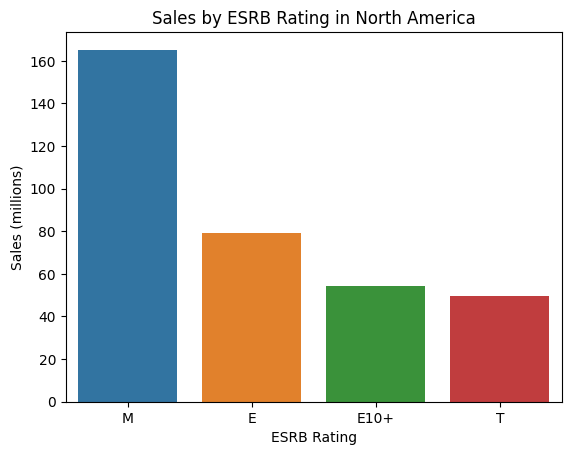

In [104]:
sns.barplot(x=esrb_na_sales.index, y=esrb_na_sales.values)
plt.title('Sales by ESRB Rating in North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in North America. The ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and  T'(Teen) lastly  games. 

In [105]:
esrb_eu_sales = relevant_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Sales (millions)')

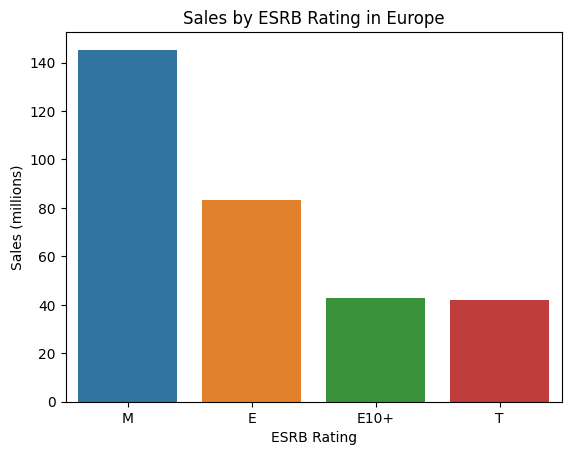

In [106]:
sns.barplot(x=esrb_eu_sales.index, y=esrb_eu_sales.values)
plt.title('Sales by ESRB Rating in Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in Europe. The ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and  T'(Teen) games  which is similar to that of North America.

In [107]:
esrb_jp_sales = relevant_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Sales (millions)')

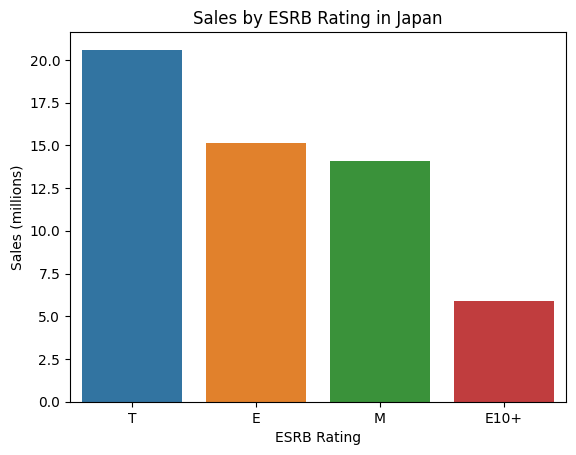

In [108]:
sns.barplot(x=esrb_jp_sales.index, y=esrb_jp_sales.values)
plt.title('Sales by ESRB Rating in Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (millions)')

The graph above shows the relation between the ESRB Rating of the games and their sales in Japan. The ESRB rating with most sales is 'T'(Teen), followed by 'E'(Everyone), 'M'(Mature), and lastly 'E10+'. This is different than that of North America and Europe which might be the result of cultural differences. 

In [109]:
numeric_rating = {'E': 1, 'T': 2, 'M': 3, 'E10+': 4, 'EC': 5, 'RP': 6}

In [110]:
relevant_data['rating_numeric'] = relevant_data['rating'].map(numeric_rating)

In [111]:
print(relevant_data['rating_numeric'].corr(relevant_data['na_sales']))

0.045257685592069975


The correlation coefficient between rating and North American sales is close to 0 (0.045), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [112]:
print(relevant_data['rating_numeric'].corr(relevant_data['eu_sales']))

0.006159649419456002


The correlation coefficient between rating and Europe sales is close to 0 (0.006), which means either there is no corelation or there is a complex non-linear connection that the coefficient can't reflect.

In [113]:
print(relevant_data['rating_numeric'].corr(relevant_data['jp_sales']))

-0.07794786394424226


The corelation coefficient between rating and Japan sales is -0.0779 which is close to 0 but in negative direction. This shows that there is slight negative correlation between the user score and sales on platform PS4.

### Test the hypotheses
**HO:** The average user ratings of the Xbox One and PC platforms are equal. <br>
**HA:** The average user ratings of the Xbox One and PC platforms are not equal. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

In [114]:
relevant_data = relevant_data.dropna(subset=['user_score'])

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>

    
Isn't it better to drop them when you make a slice in the cell below? :) 
</div>   

In [115]:
xbox_user_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
print(xbox_user_ratings)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64


In [116]:
xbox_user_ratings.mean()

6.521428571428572

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
    
You do not need to repeat the code. For instance, you can first create the `xbox_user_ratings` variable: 

    xbox_user_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score']

    
    
And then you can print its average: 
    
    
    xbox_user_ratings.mean()    
</div>

In [117]:
pc_user_ratings = relevant_data[relevant_data['platform'] == 'PC']['user_score']
print(pc_user_ratings)

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64


In [118]:
pc_user_ratings.mean()

6.2696774193548395

In [119]:
alpha = 0.05

results = st.ttest_ind(xbox_user_ratings, pc_user_ratings)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.14012658403611647
We can't reject the null hypothesis


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Pvalue should not be 0, 1, or Nan. Anytime you see these values, it may be a good idea to check the code or the arrays. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Please try to drop missing values here, it should resolve the issue.     
</div>

As the p-value is greater than alpha, we can't reject the null hypothesis. This shows that the average user ratings of the Xbox One are equal to that of PS4 platform. 

### Test the hypotheses
**HO:** The average user ratings for the Action and Sports genres are equal. <br>
**HA:** The average user ratings for the Action and Sports genres are not equal. <br>
**Statistical test = t-test** <br>
**Alpha value = 0.05**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>

    
Good. The null hypothesis always includes the equality sign. This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

In [120]:
action_user_ratings = relevant_data[relevant_data['genre'] == 'Action']['user_score']
print(action_user_ratings)

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 389, dtype: float64


In [121]:
action_user_ratings.mean()

6.837532133676092

In [122]:
sports_user_ratings = relevant_data[relevant_data['genre'] == 'Sports']['user_score']
print(sports_user_ratings)

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64


In [123]:
sports_user_ratings.mean()

5.238124999999999

In [124]:
alpha = 0.05

results = st.ttest_ind(action_user_ratings, sports_user_ratings)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.0517832389140023e-27
We reject the null hypothesis


As the p-value is less than alpha, we can reject the null hypothesis. This shows that the average user ratings of the games from action genre are not equal to that of sports genre. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>

    
Here we may also need to drop missing values. 
</div>   

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>

    
> As the p-value is less than alpha
    
    
Nan is not less than anything. We cannot compare anything with a missing value.
</div>   
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

The fact that we reject the null hypothesis does not entail that the 2nd hypothesis is true. We just reject it at a particular significance level. I would change the wording in the conclusion. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

We have two hypotheses in this section.     
</div>

## Conclusion ## 

The project is based on analyzing the data which is based on the online store Ice that sells video games all over the world to identify patterns to determine whether a games succeeds or not to spot potential big winners and plan advertising campaigns. 
The number of games released per year is increasing overtime till 2008, and then started to decline. Following this, there was a huge decline after 2011. I think the data used is not significant as the use of technology is increasing day by day and so the use of games which means the number of games releasing should be increasing rather than decreasing.

Platform 'Wii' was at the top among list of platforms with highest total sales over years. But, it can be known that this platform didn't last for long time. Along with this, there are some platform such as 'PS', 'PSP', which are there for long time compare to that of 'Wii' but were among the top 10 platforms with the lowest sales over the years.

Among all the platforms released till 2016, there were 22 platforms which faded before 2016. 

As one said the industry is evolving, the games are getting better, the graphics are getting better, and the users are getting more demanding. So, it is better to focus on the data from 5-6 years to the model year. Thus, the period I choose for 2017 model is 2013-2016. 

Among the total sales distribution of different platforms from 2013 to 2016, 'PS4' platform has the highest sales over time. Following this, 'PS3', 'XOne', '3DS', and 'X360', are the platforms where the sales distribution dropped by half of platform 'PS4'. Before 2013, if one see 'Wii' was one such platform with the highest number of sales while after 2013 its among the lowest sales.  One can see that platform 'PS4' has been increasing for one year and then again increased for another year and had a drastic fall till 2016. 'XOne' platform has a similar trend like that of 'PS4' but at low level. Platforms 'PS3' and 'X360' almost had the same trend of a huge decrease for a year and then a slight decrease for another year and lastly another drop for a year. Lastly, platform '3DS' had a straight decline from year 2013 to 2016. This shows that most of those platforms are shrinking overtime even though their total sales are high.

The platforms showing the most growth are 'PS4', 'XOne', 'DS', 'PSP', 'PSV', while the platforms showing the most decline are 'Wii', 'WiiU', '3DS', 'X360', and 'PS3'. Among those platforms with most growth, I think 'PS4', and XOne' are the only ones with actual growth because there are other platforms but their sales are in negatives, so I think the sales of rest of the platforms are still in decline. From the average sales on various platforms, it is known that platforms such as 'PS4' and 'X360' are one of the highest average sales among all the platforms followed by 'XOne', 'Wii', 'WiiU', and 'PS3' whose average sales are atleast above 0.50. 

The one of the popular platforms I choose is 'PS4', because it was growing till 2015 and then started shrinking. But, even it was shrinking, the sales were still high compare to that of other platform. On the other side, I choose 'PSV' and 'PSP' as other platforms to determine the relationship of 'total review scores', 'critic scores', and 'user scores' on the global sales of 'PSV' and 'PSP' platform. From the correlation coefficient, it is known that total review scores and critic scores have weaker positive relationship with sales of 'PS4' platform and with sales of 'PSV' and 'PSP' platforms. So if total review scores are decreasing, the sales are increasing. But user scores have weaker positive relationship with sales of PSP and PSV platforms and weaker negative relationship with sales of PS4 platforms. So if the user score is decreasing then the sales of PSP and PSV platforms are increasing and the sales of PS4 are decreasing. But, as all the correlation coefficient are close to 0, it means that there is a lack of linear correlation and so change in one variable does not help in predicting changes in the other variable.

Among all the games, most of the games are action games, followed by role-playing, adventure, sports, and shooter. From action to role-playing genre games, the number of games have almost dropped to half. If genres are having more number of games doesn't mean that they are the most profitable genres. Among all different genres, the genres with high sales are Action, Shooter, Sports, Role-Playing and Misc, while the genres with low sales are Fighting, Adventure, Simulation, Strategy, and Puzzle. This shows that the genres with high number of games results into having high number of sales, but have low sales per game unit.  From the mean and median of each genre based on total sales shows that 'Action' genres have high number of games (766), but its sales are low (321.87) compare to the number of games. While shooter genre, only had 187 games and the sales were high (232.98) compare to the number of games. Also it can be seen that shooter genre mean is 1.25 while that of action is 0.420. This shows that shooter genre have higher sales per game unit while action genre have lower sales per game unit. Most of the games from shooter genre have higher sales and are doing well while there are only some games from action genre which are doing well while the rest are struggling.

In North America, the ESRB rating with most sales is 'M'(Mature), followed by 'E'(Everyone), 'E10+', and T'(Teen) lastly games which is similar to that of in Europe. In Japan, the ESRB rating with most sales is 'T'(Teen), followed by 'E'(Everyone), 'M'(Mature), and lastly 'E10+'. This is different than that of North America and Europe which might be the result of cultural differences.

The correlation coefficient between rating and North American sales is 0.045, which means there is no correlatiob between rasting and sales in North America. While the correlation coefficient between rating and Europe sales is 0.006, and that between rating and Japan sales is -0.00779 which shows that there is negative correlation between rating and sales in those two countries. So, if rating increases, so does the sales. 

As the p-value is greater than alpha, we can't reject the null hypothesis. This shows that the average user ratings of the Xbox One are equal to that of PS4 platform. As the p-value is less than alpha, we can reject the null hypothesis. This shows that the average user ratings of the games from action genre are not equal to that of sports genre. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>

    
Good! </div>    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
The conclusion may still need to be updated :) 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    

Use "Enter" twice to move the text to the next line.     
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
The conclusion is written well.    
</div>    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
It will be great if you add a list of promising platforms and more information about each of the regions: 2-3 platforms, 2-3 genres and age ratings. Don't forget to update the final conclusion if needed.
</div>
